# Setup

In [1]:
# Core
import datetime
import os
import glob
import tempfile
import sys
import pickle
import copy

# Analysis
import numpy as np
import pandas as pd
import xarray as xr

# Plotting
import matplotlib.pyplot as plt
import matplotlib as mpl

# Debugging
import pdb, traceback
%load_ext line_profiler

# Radar Tools
import pyart
import tint
import tint.visualization
import tint.visualization_aux
from tint import animate


## You are using the Python ARM Radar Toolkit (Py-ART), an open source
## library for working with weather radar data. Py-ART is partly
## supported by the U.S. Department of Energy as part of the Atmospheric
## Radiation Measurement (ARM) Climate Research Facility, an Office of
## Science user facility.
##
## If you use this software to prepare a publication, please cite:
##
##     JJ Helmus and SM Collis, JORS 2016, doi: 10.5334/jors.119



/home/563/esh563/pyart/pyart/graph/cm.py:104: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'red' in spec:
/home/563/esh563/pyart/pyart/graph/cm_colorblind.py:32: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'red' in spec:


In [2]:
import CPOL_func as cf
import caine_func as caf
import helpers

In [3]:
# Convenience functions
%load_ext autoreload
%autoreload 1
%aimport CPOL_func
%aimport caine_func
%aimport tint.visualization
%aimport tint.visualization_aux
%aimport tint.tracks
%aimport tint.objects
%aimport tint.grid_utils
%aimport helpers

# Create Tracks

In [4]:
mp='reality'

In [22]:
def test():
    filenames = cf.CPOL_files_from_datetime_list(
        np.arange(np.datetime64('2006-02-10 08:00'), 
                  np.datetime64('2006-02-10 12:00'), 
                  np.timedelta64(10, 'm'))
    )[0]
    
#     [filenames, start_time, end_time] = caf.caine_files_from_datetime_list(
#         np.arange(np.datetime64('2006-02-09 00:00'), 
#                   np.datetime64('2006-02-13 12:30'), 
#                   np.timedelta64(10, 'm')), mp=mp
#     )

    # Generate grid generator 
    # Note generators produce iterators
    # These are alternative to using lists and looping
    grids = (pyart.io.read_grid(fn, include_fields = ['reflectivity', 'radar_estimated_rain_rate'])
             for fn in filenames)

    with open('/g/data/w40/esh563/CPOL_analysis/TINT_tracks/circ_b_ind_set.pkl', 
              'rb') as f:
        b_ind_set = pickle.load(f)

    # Define settings for tracking
    settings = {
        'MIN_SIZE' : [40, 400, 800], # square km
        'FIELD_THRESH' : ['convective', 20, 15], # DbZ
        'ISO_THRESH' : [10, 10, 10], # DbZ
        'GS_ALT' : 3000,
        'SEARCH_MARGIN' : 50000, # m. This is just for object matching step:
        # does not affect flow vectors. Note CPOL cells 2500mx2500m. 
        'FLOW_MARGIN' : 40000, # m. Margin around object over which to
        # perform phase correlation.
        'LEVELS' : np.array( # m
            [[3000, 3500], 
             [3500, 7500],
             [7500, 10000]]
        ),
        'TRACK_INTERVAL' : 0,
        'BOUNDARY_GRID_CELLS' : b_ind_set,
        'UPDRAFT_START': 3000
    }

    tracks_obj  = tint.Cell_tracks()

    for parameter in ['MIN_SIZE', 'FIELD_THRESH', 'GS_ALT', 'LEVELS', 
                      'TRACK_INTERVAL', 'ISO_THRESH', 'SEARCH_MARGIN',
                      'FLOW_MARGIN', 'BOUNDARY_GRID_CELLS', 'UPDRAFT_START'
                     ]:
        tracks_obj.params[parameter] = settings[parameter]

    # Calculate tracks
#     %lprun -T lprof0 -f tint.tracks.Cell_tracks.get_tracks tracks_obj.get_tracks(grids)
    tracks_obj.get_tracks(grids, rain=True)
    #tracks_obj = cf.get_reanalysis_vars(tracks_obj)

    # Create directory for figures
    dt=str(datetime.datetime.now())[0:-7]
    dt=dt.replace(" ", "_")
    dt=dt.replace(":", "_")
    dt=dt.replace("-", "")

    out_file_name = ('/g/data/w40/esh563/CPOL_analysis/TINT_tracks/'
                     + 'tracks_obj_{}.pkl'.format(mp))

    with open(out_file_name, 'wb') as f:
        pickle.dump(tracks_obj, f)
        
    return tracks_obj
        
if __name__ == '__main__':
    try:
        tracks_obj = test()
    except:
        extype, value, tb = sys.exc_info()
        traceback.print_exc()
        pdb.post_mortem(tb)
        
# print(open('lprof0', 'r').read())

Gathering files.
Calculating additional tracks properties.
Calculating system tracks.


Time elapsed: 0.1 minutes


In [30]:
tracks_obj.system_tracks.xs('1', level='uid')['tot_rain_loc']

scan  time               
1     2006-02-10 08:10:09    [38, 111]
2     2006-02-10 08:20:09    [37, 106]
3     2006-02-10 08:30:09    [43, 107]
4     2006-02-10 08:40:09    [43, 107]
5     2006-02-10 08:50:09    [43, 107]
6     2006-02-10 09:00:09    [48, 108]
7     2006-02-10 09:10:10    [54, 112]
8     2006-02-10 09:20:09    [49, 104]
9     2006-02-10 09:30:08    [49, 104]
10    2006-02-10 09:40:08    [49, 104]
11    2006-02-10 09:50:08    [49, 104]
12    2006-02-10 10:00:09    [49, 104]
13    2006-02-10 10:10:10    [49, 104]
14    2006-02-10 10:20:09    [49, 104]
15    2006-02-10 10:30:09    [49, 104]
16    2006-02-10 10:40:09    [49, 104]
17    2006-02-10 10:50:09    [49, 104]
18    2006-02-10 11:00:09    [49, 104]
19    2006-02-10 11:10:09    [49, 104]
20    2006-02-10 11:20:08    [49, 104]
21    2006-02-10 11:30:08    [49, 104]
22    2006-02-10 11:40:08    [49, 104]
Name: tot_rain_loc, dtype: object

In [20]:
x=np.array([1,2,3,4])

In [21]:
x[[True,True,False,False]]

array([1, 2])

# Load Tracks

In [7]:
with open('/g/data/w40/esh563/CPOL_analysis/TINT_tracks/tracks_obj_com_2001_2014.pkl', 'rb') as f:
    tracks_obj = pickle.load(f)

# Create Animations

In [62]:
def test():
    lon_min = 131.0 - 1.6
    lon_max = 131.0 + 1.6

    lat_max = -12.2 + 1.6
    lat_min = -12.2 - 1.6
    
    tracks_obj_temp = tracks_obj

#     filenames, start_time, end_time = caf.caine_files_from_TINT_obj(
#         tracks_obj_temp, '13', mp=mp
#     )
    
    [filenames, start_time, end_time] = cf.CPOL_files_from_datetime_list(
        np.arange(np.datetime64('2003-02-21 08:00'), 
                  np.datetime64('2003-02-21 10:30'), 
                  np.timedelta64(10, 'm'))
    )

#     [filenames, start_time, end_time] = caf.caine_files_from_datetime_list(
#         np.arange(np.datetime64('2006-02-09 10:00'), 
#                   np.datetime64('2006-02-09 11:00'), 
#                   np.timedelta64(10, 'm')), mp='lin'
#     )
    
    
#     tracks_obj_temp.tracks = tracks_obj_temp.tracks[sub_cond]
#     tracks_obj_temp.system_tracks = tracks_obj_temp.system_tracks[sub_cond_sys]

    # Generate grid generator 
    # Note generators produce iterators
    # These are alternative to using lists and looping
    grids = (pyart.io.read_grid(fn, include_fields = 'reflectivity')
             for fn in filenames)

    # Create directory for figures
    dt=str(datetime.datetime.now())[0:-7]
    dt=dt.replace(" ", "_")
    dt=dt.replace(":", "_")
    dt=dt.replace("-", "")

    base_path = '/g/data/w40/esh563/CPOL_analysis/figures/TINT/'
    out_path = base_path + dt + '_tint_CPOL_anim'

    animate(tracks_obj_temp, grids, out_path,
            start_datetime = start_time,
            end_datetime = end_time,
            lat_lines=np.arange(lat_min, lat_max, .2),
            lon_lines=np.arange(lon_min, lon_max, .2),
            tracers=False, keep_frames=False, dpi=100, alt_low=3000,
            alt_high=10000, scan_boundary=False, wrf_winds=False, 
            line_coords=False, mp=mp)
    
if __name__ == '__main__':
    try:
        test()
    except:
        extype, value, tb = sys.exc_info()
        traceback.print_exc()
        pdb.post_mortem(tb)

Gathering files.
Animating from 2003-02-21T08:00 to 2003-02-21T10:20.
Plotting scan at 2003-02-21T10:10:05.
Reached 2003-02-21T10:20.
Breaking loop.

Creating GIF - may take a few minutes.


In [ ]:
def test():
    uid = '13'
    filenames, start_time, end_time = caf.caine_files_from_TINT_obj(
        tracks_obj, uid, mp=mp    
    )

    lon_min = 131.0 - 2.6
    lon_max = 131.0 + 2.6

    lat_max = -12.2 + 2.6
    lat_min = -12.2 - 2.6
    
#     [filenames, start_time, end_time] = cf.CPOL_files_from_datetime_list(
#         np.arange(np.datetime64('2003-12-20 08:20'), 
#                   np.datetime64('2003-12-20 08:30'), 
#                   np.timedelta64(10, 'm'))
#     )

#     [filenames, start_time, end_time] = caf.caine_files_from_datetime_list(
#         np.arange(np.datetime64('2006-02-09 10:30'), 
#                   np.datetime64('2006-02-09 10:40'), 
#                   np.timedelta64(10, 'm')), mp=mp
#     )

    grids = (pyart.io.read_grid(fn) for fn in filenames)  # refresh grid generator

    # Create directory for figures
    dt=str(datetime.datetime.now())[0:-7]
    dt=dt.replace(" ", "_")
    dt=dt.replace(":", "_")
    dt=dt.replace("-", "")
    
    base_path = '/g/data/w40/esh563/CPOL_analysis/figures/TINT/'
    out_path = base_path + dt + '_tint_CPOL_lagrangian'
    animate(tracks_obj, grids, out_path, style='updraft', uid=uid, 
            alt_low=3000, alt_high=10000, keep_frames=False, dpi=100,
            lat_lines=np.arange(lat_min, lat_max, .2),
            lon_lines=np.arange(lon_min, lon_max, .2), 
            center_ud=False, wrf_winds=True, line_coords=True,
            average_along_line=True, quiver=False, mp=mp)
    
if __name__ == '__main__':
    try:
        test()
    except:
        extype, value, tb = sys.exc_info()
        traceback.print_exc()
        pdb.post_mortem(tb)

# Create Categories

In [11]:
categories = helpers.create_categories(tracks_obj)

In [39]:
# Let's find the cells that were tracked for the most frames.
sub_cond_sys = not_border_0 * linear
sub_cond = sub_cond_sys.append([sub_cond_sys]*2).sort_index(sort_remaining=True)
levels = np.array([0,1,2]*len(sub_cond_sys))

sub_cond = sub_cond.to_frame()
sub_cond.insert(0, 'level', levels)
sub_cond = sub_cond.reset_index()

sub_cond = sub_cond.set_index(['scan', 'time', 'level', 'uid'])
# sub_cond = sub_cond.ix[:,0]
# tracks_obj.tracks[sub_cond]
tracks_obj.system_tracks[sub_cond_sys].groupby(level='uid').size().sort_values(ascending=False)[:20]

uid
25215    80
17489    56
7495     54
2415     47
9478     46
11993    46
4736     46
2817     45
1656     44
9489     43
10387    43
6797     43
2718     42
24680    42
12111    41
11960    41
17514    40
11578    40
6075     40
2657     40
dtype: int64

In [25]:
tracks_obj.system_tracks.index

MultiIndex([(   19, '2001-11-01 05:30:00',     '0'),
            (   20, '2001-11-01 05:40:00',     '0'),
            (   21, '2001-11-01 05:50:01',     '0'),
            (   22, '2001-11-01 06:00:01',     '0'),
            (   23, '2001-11-01 06:10:00',     '0'),
            (   23, '2001-11-01 06:10:00',     '1'),
            (   24, '2001-11-01 06:20:00',     '0'),
            (   24, '2001-11-01 06:20:00',     '1'),
            (   25, '2001-11-01 06:30:00',     '0'),
            (   25, '2001-11-01 06:30:00',     '1'),
            ...
            (18791, '2015-03-28 18:40:02', '25944'),
            (18792, '2015-03-28 18:50:06', '25943'),
            (18792, '2015-03-28 18:50:06', '25944'),
            (18793, '2015-03-28 19:00:02', '25943'),
            (18793, '2015-03-28 19:00:02', '25944'),
            (18794, '2015-03-28 19:10:02', '25945'),
            (18795, '2015-03-28 19:20:02', '25946'),
            (18796, '2015-03-28 19:30:03', '25946'),
            (18797, '2015-03-2

In [60]:
tracks_obj.system_tracks.xs('3551', level='uid')

,,grid_x,grid_y,com_x,com_y,lon,lat,u,v,mergers,u_shift,...,v_shear,u_cl,v_cl,shear_dir,shear_mag,prop_dir,prop_mag,u_prop,v_prop,shear_rel_prop_dir
scan,time,,,,,,,,,,,,,,,,,,,,,
15369,2003-02-21 08:20:01,55921.1,-1315.8,55405.9,-1454.6,131.55435,-12.26178,NaN,NaN,{},6.257,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15370,2003-02-21 08:30:01,53942.3,3846.2,53965.4,3683.9,131.54101,-12.21559,NaN,NaN,{},5.560,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15371,2003-02-21 08:40:00,61875.0,4479.2,61987.5,4460.0,131.61481,-12.20847,6.387,0.184,{},4.996,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15372,2003-02-21 08:50:00,68783.8,3648.6,68775.4,3557.4,131.67729,-12.21645,8.224,-1.198,{},4.163,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15373,2003-02-21 09:00:00,71250.0,-875.0,71303.6,-460.5,131.70064,-12.25253,3.170,0.181,{},3.328,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15374,2003-02-21 09:10:05,73680.6,972.2,73455.5,1281.5,131.72040,-12.23682,3.227,-0.016,{},3.328,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15375,2003-02-21 09:20:01,69482.8,4913.8,69557.7,5118.8,131.68445,-12.20239,4.688,0.365,{},3.328,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15376,2003-02-21 09:30:00,76527.8,3611.1,76287.6,3790.8,131.74641,-12.21418,6.463,-0.374,{},3.335,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15377,2003-02-21 09:40:00,82500.0,0.0,81964.6,652.3,131.79872,-12.24227,8.384,-0.238,{},4.161,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Calculate Some Statistics

## PS, TS, LS Breakdown

In [34]:
subset_logic = sig_area & not_border & not_border_0 & sig_vel_mag & sig_tilt_mag
sub_tracks = tracks_obj.system_tracks[subset_logic]
# sub_tracks = tracks_obj.system_tracks

sub_uids = list(sorted(set([int(sub_tracks.index.values[i][2]) for i in range(len(sub_tracks))])))
sub_uids = [str(i) for i in sub_uids]

MCS_lengths = [len(sub_tracks.xs(i, level='uid').reset_index(level='time').index.values) for i in sub_uids]
max_MCS = max(MCS_lengths)

# Create 3 lists with lengths the lifetime of longest object.
[TS, LS, PS, totals] = [np.zeros(100) for i in range(4)]

for i in sub_uids:
    
    obj = sub_tracks.xs(i, level='uid').reset_index(level='time')
    scans = obj.index.values
    scan_label = scans - min(scans)
    tilts = obj['sys_rel_tilt_dir']
    
    # Break down sig_tilt categories
    forward_tilt = ((-45 <= tilts) & (tilts <= 45)) 
    backward_tilt = ((-135 >= tilts) | (tilts >= 135)) 

    fwd_inds = scan_label[np.argwhere(forward_tilt).flatten().tolist()].tolist()
    bwd_inds = scan_label[np.argwhere(backward_tilt).flatten().tolist()].tolist()
    pll_inds = scan_label[np.argwhere(~backward_tilt & ~forward_tilt).flatten().tolist()].tolist()
    totals_inds = scan_label.tolist()

    # Found error with large com dataset - object 14060 jumps across seasons
    try:
        TS[bwd_inds] += 1
        LS[fwd_inds] += 1
        PS[pll_inds] += 1
        totals[totals_inds] += 1
    except:
        print('Error with system {}.'.format(i))

## System Size

In [7]:
# subset_logic = ~small_area
# sub_tracks = tracks_obj.system_tracks[subset_logic]
sub_tracks = tracks_obj.system_tracks

sub_uids = list(sorted(set([int(sub_tracks.index.values[i][2]) for i in range(len(sub_tracks))])))
sub_uids = [str(i) for i in sub_uids]

# MCS_lengths = [len(sub_tracks.xs(i, level='uid').reset_index(level='time').index.values) for i in sub_uids]
# max_MCS = max(MCS_lengths)

In [14]:
# Create 3 lists with lengths the lifetime of longest object.
[large, small, medium, nb, totals] = [np.zeros(100) for i in range(5)]

from tqdm import tqdm

for i in tqdm(sub_uids, file=sys.stdout, position=0, leave=True):
    
#     import pdb
#     pdb.set_trace()
    
    obj = sub_tracks.xs(i, level='uid').reset_index(level='time')
    cat = categories.xs(i, level='uid').reset_index(level='time')
    scans = obj.index.values
    scan_label = scans - min(scans)
    
    # Define classifications
    large_area = cat['large_area'].values
    small_area = cat['small_area'].values
    medium_area = ~large_area & ~small_area
    not_border = cat['not_border'].values | cat['not_border_0'].values
    
    large_inds = scan_label[large_area]
    medium_inds = scan_label[medium_area]
    small_inds = scan_label[small_area]
    not_border_inds = scan_label[not_border]
    totals_inds = scan_label.tolist()
    
    # Break down sig_tilt categories
#     forward_tilt = ((-45 <= tilts) & (tilts <= 45)) 
#     backward_tilt = ((-135 >= tilts) | (tilts >= 135)) 

#     fwd_inds = scan_label[np.argwhere(forward_tilt).flatten().tolist()].tolist()
#     bwd_inds = scan_label[np.argwhere(backward_tilt).flatten().tolist()].tolist()
#     pll_inds = scan_label[np.argwhere(~backward_tilt & ~forward_tilt).flatten().tolist()].tolist()

    # Found error with large com dataset - object 14060 jumps across seasons
    try:
        large[large_inds] += 1
        small[small_inds] += 1
        medium[medium_inds] += 1
        nb[not_border_inds] += 1
        totals[totals_inds] += 1
    except:
        print('Error with system {}.'.format(i))

100%|██████████| 25948/25948 [02:18<00:00, 186.83it/s]


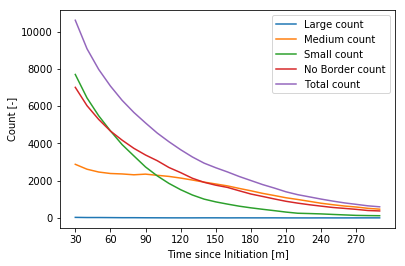

In [17]:
plt.plot(np.arange(30,300,10), large[3:30], label='Large count')
plt.plot(np.arange(30,300,10), medium[3:30], label='Medium count')
plt.plot(np.arange(30,300,10), small[3:30], label='Small count')
plt.plot(np.arange(30,300,10), nb[3:30], label='No Border count')
plt.plot(np.arange(30,300,10), totals[3:30], label='Total count')
plt.xticks(np.arange(30,300,30))
plt.ylabel('Count [-]')
plt.xlabel('Time since Initiation [m]')
plt.legend()
plt.savefig('/g/data/w40/esh563/CPOL_analysis/figures/TINT/size_counts.png')

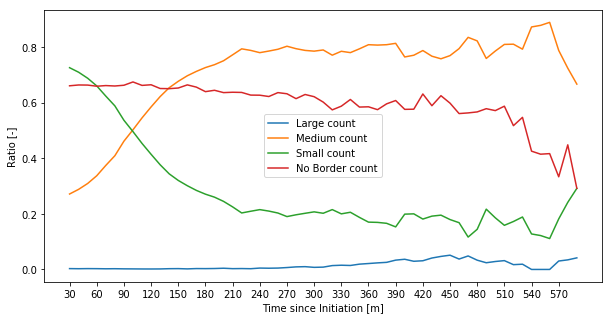

In [22]:
plt.figure(figsize=(10,5))
plt.plot(np.arange(30,600,10), (large/totals)[3:60], label='Large count')
plt.plot(np.arange(30,600,10), (medium/totals)[3:60], label='Medium count')
plt.plot(np.arange(30,600,10), (small/totals)[3:60], label='Small count')
plt.plot(np.arange(30,600,10), (nb/totals)[3:60], label='No Border count')
plt.xticks(np.arange(30,600,30))
plt.ylabel('Ratio [-]')
plt.xlabel('Time since Initiation [m]')
plt.legend()
# Note that we don't really know the start times of the systems!
plt.savefig('/g/data/w40/esh563/CPOL_analysis/figures/TINT/size_ratios.png')

## Training Lines

In [42]:
subset_logic = not_border & not_border_0 & ~large_area & ~small_area & linear & ~stationary & sig_vel_mag
sub_tracks = tracks_obj.system_tracks[subset_logic]
sub_cat = categories[subset_logic]
# sub_tracks = tracks_obj.system_tracks

sub_uids = list(sorted(set([int(sub_tracks.index.values[i][2]) for i in range(len(sub_tracks))])))
sub_uids = [str(i) for i in sub_uids]

# MCS_lengths = [len(sub_tracks.xs(i, level='uid').reset_index(level='time').index.values) for i in sub_uids]
# max_MCS = max(MCS_lengths)

In [43]:
# Create 3 lists with lengths the lifetime of longest object.
[par, perp, totals] = [np.zeros(100) for i in range(3)]

from tqdm import tqdm

for i in tqdm(sub_uids, file=sys.stdout, position=0, leave=True):
       
    obj = sub_tracks.xs(i, level='uid').reset_index(level='time')
    cat = sub_cat.xs(i, level='uid').reset_index(level='time')
    scans = obj.index.values
    scan_label = scans - min(scans)
    
    # Define classifications
    perp_align = cat['perp_align'].values
    par_align = cat['par_align'].values
        
    par_inds = scan_label[par_align]
    perp_inds = scan_label[perp_align]
    totals_inds = scan_label.tolist()

    # Found error with large com dataset - object 14060 jumps across seasons
    try:
        par[par_inds] += 1
        perp[perp_inds] += 1
        totals[totals_inds] += 1
    except:
        print('Error with system {}.'.format(i))

100%|██████████| 2670/2670 [00:13<00:00, 199.88it/s]


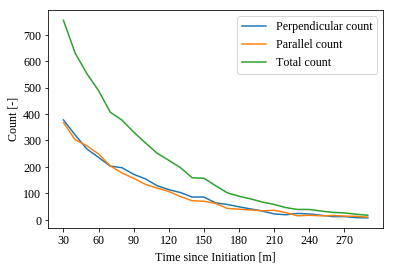

In [44]:
plt.plot(np.arange(30,300,10), perp[3:30], label='Perpendicular count')
plt.plot(np.arange(30,300,10), par[3:30], label='Parallel count')
plt.plot(np.arange(30,300,10), totals[3:30], label='Total count')
plt.xticks(np.arange(30,300,30))
plt.ylabel('Count [-]')
plt.xlabel('Time since Initiation [m]')
plt.legend()
plt.savefig('/g/data/w40/esh563/CPOL_analysis/figures/TINT/size_counts.png')

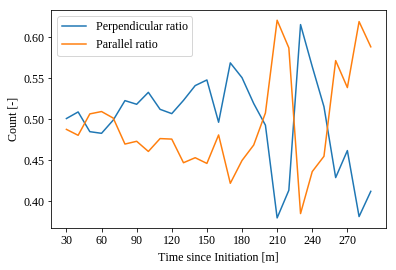

In [45]:
plt.plot(np.arange(30,300,10), (perp/totals)[3:30], label='Perpendicular ratio')
plt.plot(np.arange(30,300,10), (par/totals)[3:30], label='Parallel ratio')
plt.xticks(np.arange(30,300,30))
plt.ylabel('Count [-]')
plt.xlabel('Time since Initiation [m]')
plt.legend()
plt.savefig('/g/data/w40/esh563/CPOL_analysis/figures/TINT/size_counts.png')

## Updraft Tilt versus Stratiform Tilt

In [29]:
def calc_mean_max_updrafts(system_tracks, min_height_ind = 20):
    ud = system_tracks['updrafts']
    ud_tilt = []
    tallest_ud = []
    mean_ud = []
    no_tilt=0
    for i in range(len(ud)):
        ud_i = ud.iloc[i]
        ud_tilt_i = []
        for j in range(len(ud_i)):
            if ud_i[j][-1][0] >= min_height_ind:
                ud_tilt_i_j = (ud_i[j][-1]-ud_i[j][0])*(.5, 2.5, 2.5)
                if np.all(ud_tilt_i_j[1:3] == [0,0]):
                    # Count updrafts with no tilt seperately
                    no_tilt+=1
                else:
                    ud_tilt_i.append(ud_tilt_i_j)
       
        if ud_tilt_i != []:
            ud_tilt.append(ud_tilt_i)
            mean_ud.append(np.nanmean(np.array(ud_tilt_i), axis=0))
        else:
            ud_tilt.append(np.ones(3)*np.nan)
            mean_ud.append(np.ones(3)*np.nan)
        try:
            tallest_ind = np.argmax(np.array(ud_tilt_i)[:,0])
            tallest_ud.append(np.array(ud_tilt_i)[tallest_ind,:])
        except:
            tallest_ud.append(np.ones(3)*np.nan)
        
    return ud_tilt, mean_ud, tallest_ud

### Tallest Updraft

In [33]:
subset_logic = sig_area & not_border & sig_tilt_mag & not_border_0 & sig_vel_mag
sub_tracks = tracks_obj.system_tracks[subset_logic]
ud_tilt, mean_ud, tallest_ud = calc_mean_max_updrafts(sub_tracks)

num = np.array(tallest_ud)
den = np.tile(np.array(tallest_ud)[:,0], (3,1)).transpose()
ud_norm = (num/den)[:,1:]
ud_mag = np.sqrt(ud_norm[:,0] ** 2 + ud_norm[:,1] ** 2)
ud_dir = np.arctan2(ud_norm[:,0], ud_norm[:,1])
ud_dir = np.rad2deg(ud_dir)

vel_dir = sub_tracks['vel_dir'].values
tilt_dir = sub_tracks['tilt_dir'].values

sys_rel_tilt_dir = np.mod(tilt_dir - vel_dir, 360)
sys_rel_tilt_dir = np.round(sys_rel_tilt_dir, 3)

sys_rel_ud_tilt_dir = np.mod(ud_dir - vel_dir, 360)
sys_rel_ud_tilt_dir = np.round(sys_rel_ud_tilt_dir, 3)

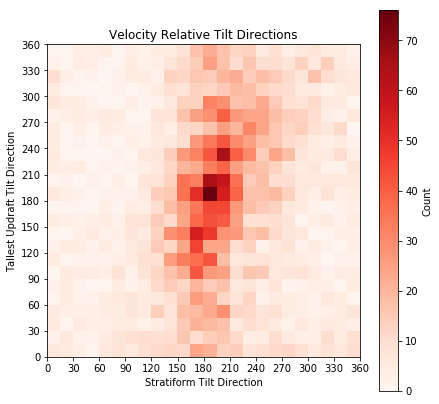

In [35]:
vel_dir = sub_tracks['vel_dir'].values
vel_mag = np.sqrt(sub_tracks['u_shift']**2 + sub_tracks['v_shift']**2).values
tilt_dir = sub_tracks['tilt_dir'].values
bins = np.arange(0,360+15,15)
ticks = np.arange(0,360+30,30)

fig = plt.figure(figsize=[7,7])
ax = fig.add_subplot(111)
h = ax.hist2d(sys_rel_tilt_dir, sys_rel_ud_tilt_dir, bins=bins, range=[[0, 360], [0, 360]], cmap='Reds')
# ax.scatter(tilt_dir, ud_dir, s=0.75)
plt.xlabel('Stratiform Tilt Direction')
plt.ylabel('Tallest Updraft Tilt Direction')
plt.title('Velocity Relative Tilt Directions')
plt.xlim([0, 360])
plt.ylim([0, 360])
plt.xticks(ticks)
plt.yticks(ticks)
ax.set_aspect('equal')
cb = plt.colorbar(h[3], ax=ax)
cb.set_label('Count')

### Mean Updraft

In [36]:
subset_logic = sig_area & not_border & sig_tilt_mag & not_border_0 & sig_vel_mag
sub_tracks = tracks_obj.system_tracks[subset_logic]
ud_tilt, mean_ud, tallest_ud = calc_mean_max_updrafts(sub_tracks)

num = np.array(mean_ud)
den = np.tile(np.array(mean_ud)[:,0], (3,1)).transpose()
ud_norm = (num/den)[:,1:]
ud_mag = np.sqrt(ud_norm[:,0] ** 2 + ud_norm[:,1] ** 2)
ud_dir = np.arctan2(ud_norm[:,0], ud_norm[:,1])
ud_dir = np.rad2deg(ud_dir)

vel_dir = sub_tracks['vel_dir'].values
tilt_dir = sub_tracks['tilt_dir'].values

sys_rel_tilt_dir = np.mod(tilt_dir - vel_dir, 360)
sys_rel_tilt_dir = np.round(sys_rel_tilt_dir, 3)

sys_rel_ud_tilt_dir = np.mod(ud_dir - vel_dir, 360)
sys_rel_ud_tilt_dir = np.round(sys_rel_ud_tilt_dir, 3)

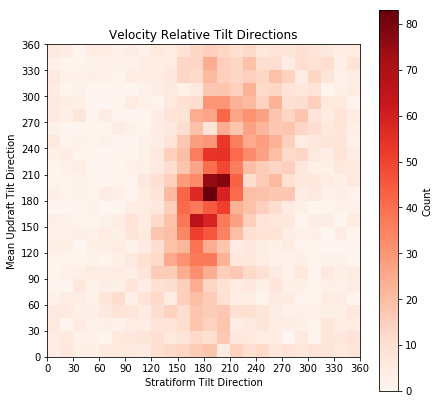

In [38]:
vel_dir = sub_tracks['vel_dir'].values
vel_mag = np.sqrt(sub_tracks['u_shift']**2 + sub_tracks['v_shift']**2).values
tilt_dir = sub_tracks['tilt_dir'].values
bins = np.arange(0,360+15,15)
ticks = np.arange(0,360+30,30)

fig = plt.figure(figsize=[7,7])
ax = fig.add_subplot(111)
h = ax.hist2d(sys_rel_tilt_dir, sys_rel_ud_tilt_dir, bins=bins, range=[[0, 360], [0, 360]], cmap='Reds')
# ax.scatter(tilt_dir, ud_dir, s=0.75)
plt.xlabel('Stratiform Tilt Direction')
plt.ylabel('Mean Updraft Tilt Direction')
plt.title('Velocity Relative Tilt Directions')
plt.xlim([0, 360])
plt.ylim([0, 360])
plt.xticks(ticks)
plt.yticks(ticks)
ax.set_aspect('equal')
cb = plt.colorbar(h[3], ax=ax)
cb.set_label('Count')